<a href="https://colab.research.google.com/github/dharmeshjindal/MachineLearning/blob/main/SVM(different_kernels)_KNN_NaiveBayes_SupervisedLearning(Part_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
path = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [3]:
headernames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

In [4]:
data = pd.read_csv(path, names=headernames)
data.shape

(150, 5)

In [5]:
data.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 4].values

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

**Naive Bayes**

Now, we are training the model with the help of the GaussianNB class of sklearn as follows:

In [9]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train);

Let us first test the accuracy of the Naive Bayes classifier over the training dataset.

In [11]:
y_pred = classifier.predict(X_train)

In [12]:
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9619047619047619


For the Naive Bayes classifier, we are achieving an accuracy of 96.19% (approximately) for the training dataset. Therefore, the accuracy is really good on the training dataset.

Now, we have to make the prediction, which can be done in the following way:

In [13]:
y_pred = classifier.predict(X_test)

Let's print the results as follows:

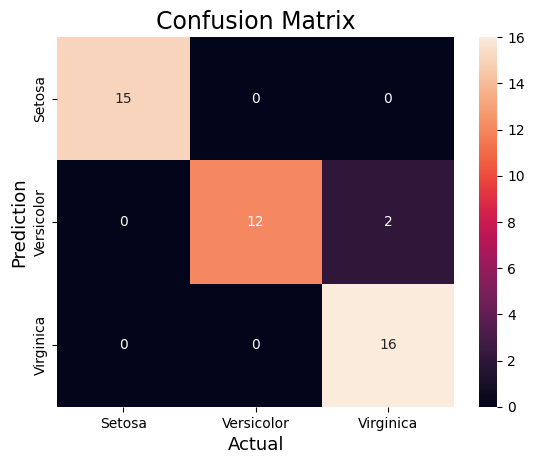

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
sns.heatmap(result,
            annot=True,
            fmt='g',
            xticklabels=['Setosa','Versicolor', 'Virginica'],
            yticklabels=['Setosa','Versicolor', 'Virginica'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

Out of 15 Setosas, 15 have been correctly classified as Setosa. Out of 14 versicolors, 12 have been correctly classified as Versicolor and 2 has been wrongly classified as Virginica. Out of 16 Virginicas, 16 have been correctly classified as Virginica.

In [15]:
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.86      0.92        14
 Iris-virginica       0.89      1.00      0.94        16

       accuracy                           0.96        45
      macro avg       0.96      0.95      0.95        45
   weighted avg       0.96      0.96      0.96        45

Accuracy: 0.9555555555555556


We have achieved an accuracy of 95.56% (approximately) using Naive Bayes classifier. Therefore, the accuracy is also good for the test dataset.

As we can see, the accuracies are almost similar for the training and test datasets in the case of the Naive Bayes classifier. Hence, we can also conclude that there are no underfitting or overfitting scenarios.

**Support Vector Machine (SVM)**

Let us first test the accuracy of the SVM classifier for different kernels over the training dataset.

In [16]:
# import support vector classifier
# "Support Vector Classifier"
from sklearn.svm import SVC
accuracy_list = []

for i in ['linear', 'poly', 'rbf', 'sigmoid']:
  clf = SVC(kernel=i)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_train)
  accuracy = accuracy_score(y_train, y_pred)
  accuracy_list.append(accuracy)

  print("accuracy of "+ i, "is", float(accuracy))

accuracy of linear is 0.9809523809523809
accuracy of poly is 0.9333333333333333
accuracy of rbf is 0.9619047619047619
accuracy of sigmoid is 0.8857142857142857


In [17]:
accuracies = {
    'Linear': accuracy_list[0],
    'Polynomial': accuracy_list[1],
    'RBF': accuracy_list[2],
    'Sigmoid': accuracy_list[3]
}

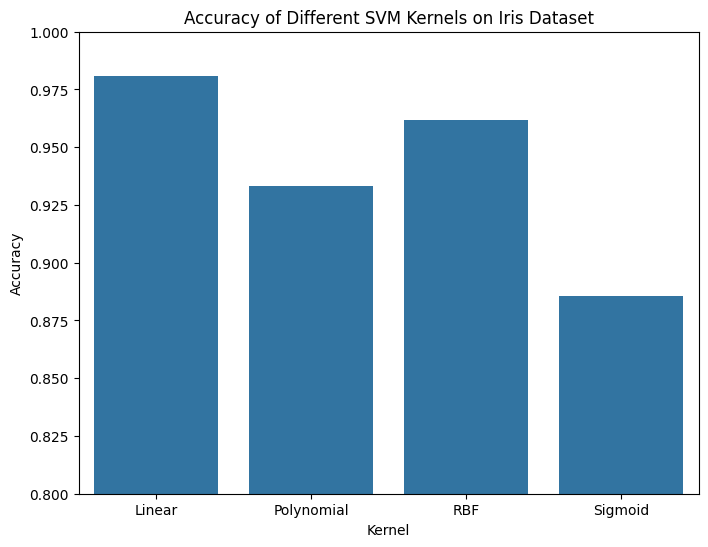

In [18]:
plt.figure(figsize=(8, 6))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different SVM Kernels on Iris Dataset')
plt.ylim(0.8, 1.0)  # Set y-axis limits for better visualization
plt.show()

In SVM, we have achieved the highest accuracy with the Linear kernel, which is 98.09%. In the RBF kernel, we have achieved the 2nd highest accuracy, which is 96.19%. In the case of the polynomial kernel and sigmoid kernel, we have achieved accuracies of 93.33% and 88.57% respectively. Therefore, the accuracies are really good on the training datasets for the different kernels used by the SVM.

In [19]:
accuracy_list = []

for i in ['linear', 'poly', 'rbf', 'sigmoid']:
  clf = SVC(kernel=i)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  accuracy_list.append(accuracy)

  print("accuracy of "+ i, "is", float(accuracy))


accuracy of linear is 0.9777777777777777
accuracy of poly is 0.9333333333333333
accuracy of rbf is 1.0
accuracy of sigmoid is 0.8888888888888888


In [20]:
accuracies = {
    'Linear': accuracy_list[0],
    'Polynomial': accuracy_list[1],
    'RBF': accuracy_list[2],
    'Sigmoid': accuracy_list[3]
}

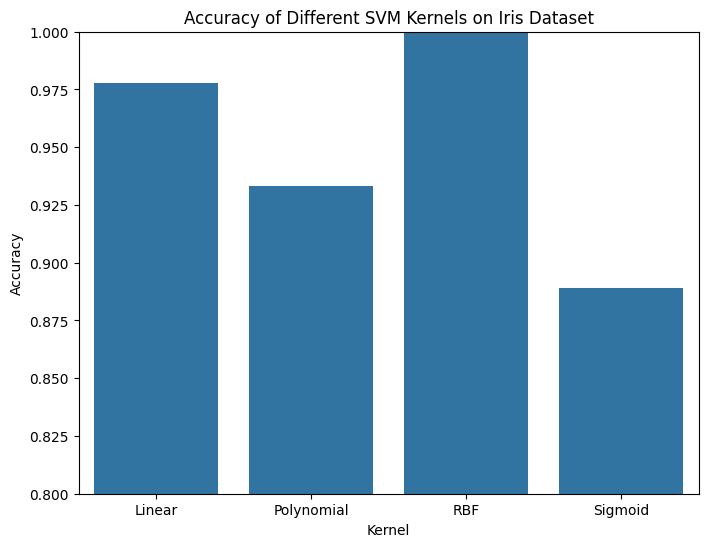

In [21]:
plt.figure(figsize=(8, 6))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different SVM Kernels on Iris Dataset')
plt.ylim(0.8, 1.0)  # Set y-axis limits for better visualization
plt.show()

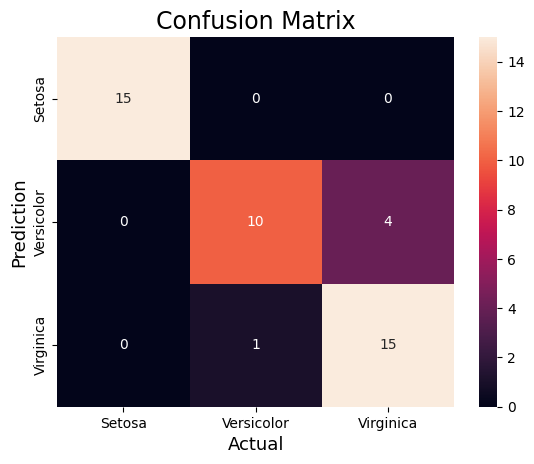

In [22]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
sns.heatmap(result,
            annot=True,
            fmt='g',
            xticklabels=['Setosa','Versicolor', 'Virginica'],
            yticklabels=['Setosa','Versicolor', 'Virginica'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [23]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [24]:
y_pred = classifier.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9714285714285714


In [25]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=9)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [26]:
y_pred = classifier.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9428571428571428


In [27]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=10)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [28]:
y_pred = classifier.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9714285714285714


In [29]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=11)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [30]:
y_pred = classifier.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9428571428571428


In [31]:
y_pred = classifier.predict(X_test)

In [32]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)

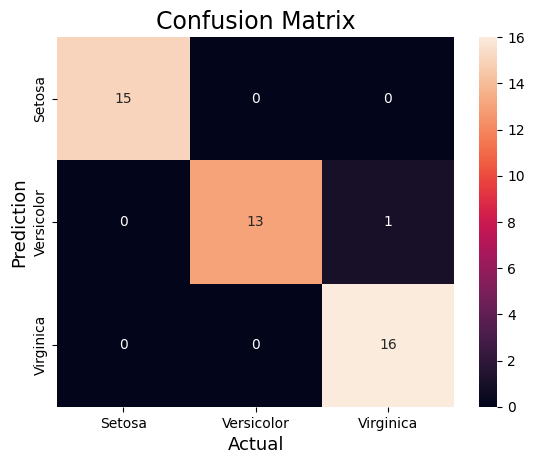

In [33]:
sns.heatmap(result,
            annot=True,
            fmt='g',
            xticklabels=['Setosa','Versicolor', 'Virginica'],
            yticklabels=['Setosa','Versicolor', 'Virginica'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [34]:
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.93      0.96        14
 Iris-virginica       0.94      1.00      0.97        16

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

Accuracy: 0.9777777777777777


In [35]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=9)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [36]:
y_pred = classifier.predict(X_test)

In [37]:
#from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)

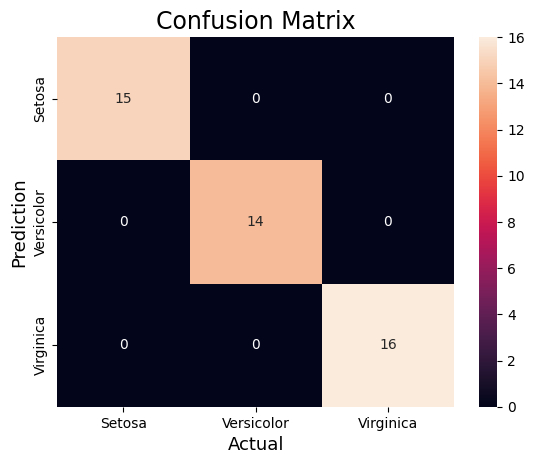

In [38]:
sns.heatmap(result,
            annot=True,
            fmt='g',
            xticklabels=['Setosa','Versicolor', 'Virginica'],
            yticklabels=['Setosa','Versicolor', 'Virginica'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [39]:
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        14
 Iris-virginica       1.00      1.00      1.00        16

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

Accuracy: 1.0


In [40]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=10)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [41]:
y_pred = classifier.predict(X_test)

In [42]:
#from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)

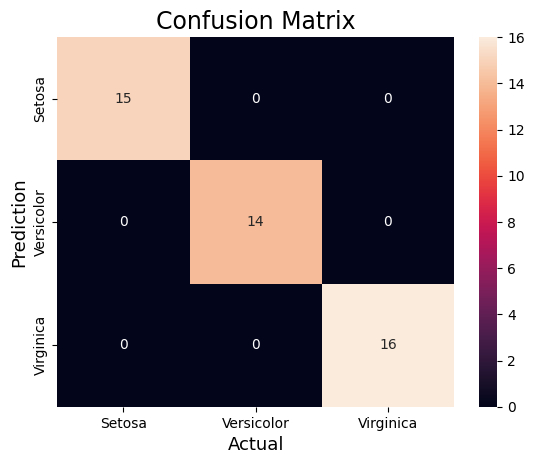

In [43]:
sns.heatmap(result,
            annot=True,
            fmt='g',
            xticklabels=['Setosa','Versicolor', 'Virginica'],
            yticklabels=['Setosa','Versicolor', 'Virginica'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [44]:
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        14
 Iris-virginica       1.00      1.00      1.00        16

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

Accuracy: 1.0
